# Estadistica para Negocios
## Distribuciones muestrales

En este notebook, veremos cómo los estadisticos muestrales que vimos en los modulos anteriores permiten nos permiten describir a una población.

Para ello, volveremos a tomar el rol de analistas. La gerencia está interesada en caracterizar a sus vendedores empleados. Para ello, cuenta con la base `base_ventas.xlsx`, la cual contiene las siguientes variables de los 473 trabajadores:

- `ventas`: Ventas del trabajador en el ultimo periodo (en miles de pesos)
- `capacitacion`: Variable igual a 1 si el trabajador esta capacitado
- `edad`: Edad en años
- `educ`: Escolaridad en años

Primero, cargaremos los modulos relevantes de esta sesion: `pandas`, `matplotlib` y la distribucion normal desde `scipy.stats`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Luego, abriremos la base de datos y la guardamos en un objeto llamado `df`:

In [2]:
df = pd.read_excel('base_ventas.xlsx')
df

,ventas,capacitacion,edad,educ
0,914.186634,1,38,10.0
1,830.613618,0,45,12.0
2,460.459386,0,41,11.0
3,537.723534,0,42,10.0
4,891.240717,0,39,13.0
...,...,...,...,...
468,1589.913330,0,44,15.5
469,3317.825309,1,43,12.0
470,967.073815,1,38,12.0
471,1137.939587,1,35,10.0


Supongamos, por un momento, que esta base de datos describe a la totalidad de los trabajadores del area de ventas. Por lo tanto, esta base de datos constituye la **población**.

Ahora, la dirección de la empresa requiere una descripción estadistica de las ventas. Para ello, podemos simplemente usar el método `describe()`:

In [3]:
df.describe()

,ventas,capacitacion,edad,educ
count,473.000000,473.000000,473.000000,473.000000
mean,1634.861653,0.348837,42.987315,12.143763
std,1279.665906,0.477107,6.676852,1.207835
min,35.894160,0.000000,23.000000,8.000000
25%,596.091861,0.000000,38.000000,12.000000
50%,1291.804155,0.000000,42.000000,12.000000
75%,2378.664494,1.000000,48.000000,12.000000
max,4999.109503,1.000000,63.000000,19.000000


De este análisis, podemos observar que la media de las ventas es de $1.634.862, un 34% de los trabajadores cuenta con capacitación, la edad promedio es de aproximadamente 43 años, y en promedio, los trabajadores cuentan con 12 años de escolaridad.

Bajo el supuesto de que esta base de datos constituye a la población total, podemos decir que:

$$\mu_{ventas} = 1634.862$$
$$\sigma_{ventas} = 1279.666$$
$$p_{capacitacion} = 0.34$$

Donde $\mu$ y $\sigma$ es la **media y desviación estándar poblacional**, respectivamente. $p$ es la proporción de trabajadores capacitados en la población.

## Estimación puntual

Ahora, es razonable pensar de que los analistas podrían no tener acceso inmediato a la población completa. Por ejemplo, se requiere información inmediata, o es costoso obtener la información, o por razones de privacidad esta no es accesible.

Alternativamente, la empresa puede contar con una **muestra**. Usando pandas, esto es muy sencillo. Por ejemplo, podemos tomar una muestra aleatoria de 30 personas, y calcularemos la media y desviación estandar de las ventas:

In [4]:
df_sample = df.sample(30,random_state=12345)
df_sample['ventas'].describe()

count      30.000000
mean     1799.462846
std      1365.749291
min       180.594529
25%       561.326176
50%      1367.012114
75%      2869.314555
max      4732.953419
Name: ventas, dtype: float64

In [5]:
df_sample['capacitacion'].mean()

0.43333333333333335

De esta descripción muestral, podemos ver que:

$$ \bar{X} = 1799.46 $$
$$ s = 1365.75 $$
$$ \bar{p} = 0.433 $$

Donde $\bar{X}$ y $s$ son la **media y desviación estándar muestral, respectivamente**, y $\bar{p}$ es la proporción muestral. A estos estadisticos descriptivos se les llama los **estimadores puntuales** de $\mu$, $\sigma$ y $p$, respectivamente.

Notar que la media de la muestra es mayor que la media poblacional. Si tomamos otra muestra:

In [6]:
df_sample2 = df.sample(30,random_state=333) # Distinta semilla
df_sample2['ventas'].describe()

count      30.000000
mean     1653.074618
std      1392.805479
min       123.505384
25%       468.846156
50%      1327.798413
75%      2440.151584
max      4902.619015
Name: ventas, dtype: float64

In [7]:
df_sample2['capacitacion'].mean()

0.3

Podemos ver que la media y desviación estándar cambiaron con respecto a la muestra anterior.

De este pequeño ejercicio, podemos obtener una importante lección: los estadisticos descriptivos dependen de la muestra. Es decir, distintas muestras entregarán distintos estadisticos.

Dicho lo anterior, el analista se puede preguntar: si recolecto distintas muestras, y calculo los estimadores puntuales de la media y la desviación estándar, ¿cómo puedo saber dónde se podrían ubicar los verdaderos estadisticos poblacionales?

Para responder esta pregunta, debemos describir las **distribuciones muestrales** de estos estadisticos.

## Distribuciones muestrales

Supongamos que podemos tomar muestras aleatorias de 30 trabajadores. Cada vez que tomamos una muestra, calculamos la media y la proporción. El siguiente codigo de python permite hacer esto usando el operador _for_:

In [8]:
media_ventas = []   # Crear una lista vacia para las medias
p_cap = []       # Lista vacia para las proporciones

# Tomar 1000 muestras aleatorias de 30 individuos:
for i in range(1000):
    df_sample_loop = df.sample(n=30)
    
    # En cada muestra, tomar la media de las ventas, y la proporción de trabajadores capacitados:
    media_ventas.append(df_sample_loop['ventas'].mean())
    p_cap.append(df_sample_loop['capacitacion'].mean())

# Guardaremos cada lista como una base de datos de Pandas
media_ventas = pd.Series(media_ventas)
p_cap = pd.Series(p_cap)

Ahora, graficaremos un histograma de la media de las ventas y de la proporcion de capacitaciones:

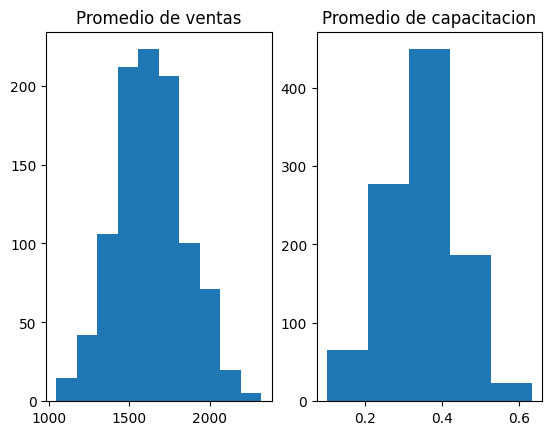

In [9]:
# Crear una figura de 1x2
fig, (ax1,ax2) = plt.subplots(1,2)

# Graficar histograma de la media de las ventas
ax1.hist(media_ventas)
ax1.set_title('Promedio de ventas')

# Graficar histograma de la capacitacion
ax2.hist(p_cap,bins=5)
ax2.set_title('Promedio de capacitacion')

plt.show()

Visualmente, la distribución de la media de las ventas y de la proporción de capacitados describe una **distribución normal**. Esto es un resultado del **teorema del limite central**. De hecho, podemos dibujar la distribución normal usando la media y desviación estándar de nuestra primera muestra:

In [10]:
# Obtener la media y desviación estandar
prom_ventas = df_sample['ventas'].mean()
sd_ventas = df_sample['ventas'].std()

# Obtener rango de las ventas
min_ventas = df_sample['ventas'].min()
max_ventas = df_sample['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x = np.linspace(min_ventas,max_ventas,100)

# Crear la distribucion normal
y = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)

In [11]:
# Obtener la media y desviación estandar
prom_ventas = df_sample2['ventas'].mean()
sd_ventas = df_sample2['ventas'].std()

# Obtener rango de las ventas
min_ventas = df_sample2['ventas'].min()
max_ventas = df_sample2['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x2 = np.linspace(min_ventas,max_ventas,100)

# Crear la distribucion normal
y2 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)

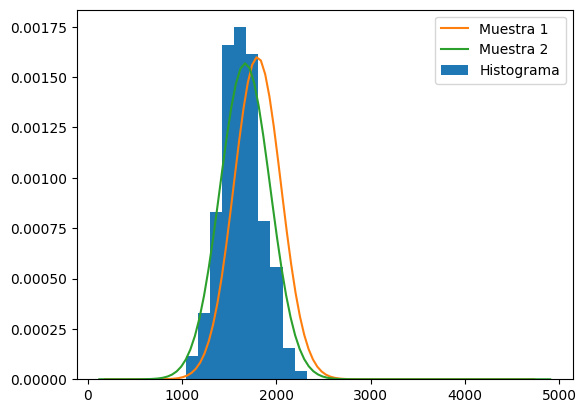

In [12]:
# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.hist(media_ventas,density=True)
ax.plot(x,y)
ax.plot(x2,y2)

plt.legend(['Muestra 1', 'Muestra 2', 'Histograma'])
plt.show()

## Importancia de la distribucion muestral

Del ejercicio anterior, vimos que es posible conocer la distribucion muestral de los estadisticos muestrales gracias al teorema del limite central. Ahora, veremos la relevancia de conocer las distribuciones muestrales. Supongamos que la empresa quiere conocer la probabilidad de que, al tomar una muestra de 30 trabajadores, las ventas estén en un rango de 200 dólares alrededor de las ventas promedio.

Primero, graficaremos la distribución muestral:

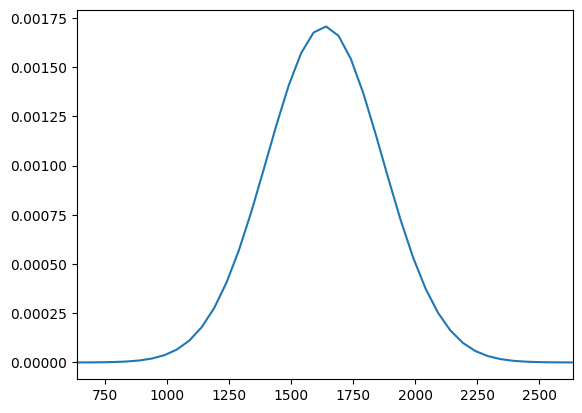

In [24]:
# Obtener la media y desviación estandar
prom_ventas = df['ventas'].mean()
sd_ventas = df['ventas'].std()

# Obtener rango de las ventas
min_ventas = df['ventas'].min()
max_ventas = df['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x = np.linspace(min_ventas,max_ventas,100)

# Crear la distribucion normal
y = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)

# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set_xlim((prom_ventas-1000,prom_ventas+1000))

plt.show()

El promedio de las ventas es:

In [14]:
print(prom_ventas)

1634.8616532326535


Igual a $1.634.862. Luego, podemos usar las funciones de distribución acumulada para calcular la probabilidad que, en una muestra aleatoria de 30 trabajadores, las ventas promedio estén alrededor de 200 mil pesos alrededor de la media:

In [15]:
p1 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).cdf(prom_ventas + 200)
p2 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).cdf(prom_ventas - 200)

print(p1-p2)

0.6080243079237819


La probabilidad es 60.8%. Gráficamente:

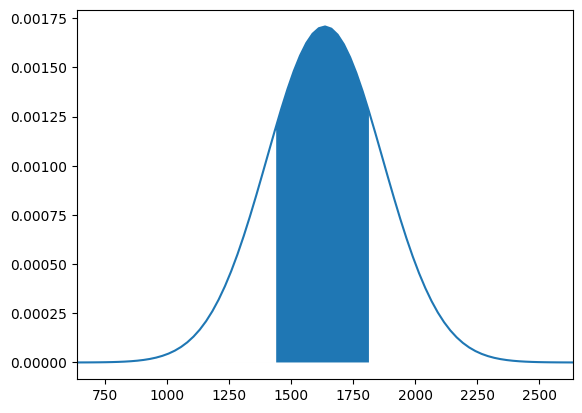

In [21]:
# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.fill_between(x[x<prom_ventas+200],y[x<prom_ventas+200])
ax.fill_between(x[x<prom_ventas-200],y[x<prom_ventas-200],color='white')
ax.set_xlim((prom_ventas-1000,prom_ventas+1000))

plt.show()

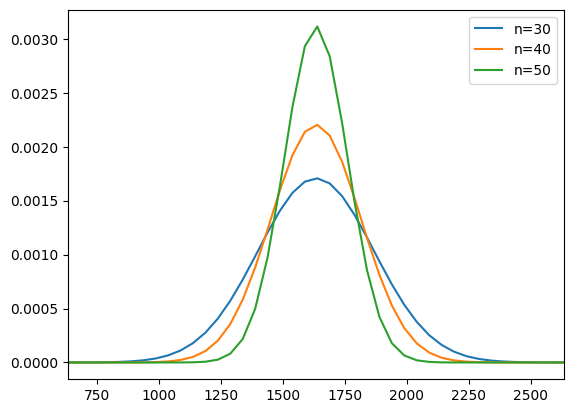

In [23]:
# Obtener la media y desviación estandar
prom_ventas = df['ventas'].mean()
sd_ventas = df['ventas'].std()

# Obtener rango de las ventas
min_ventas = df['ventas'].min()
max_ventas = df['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x = np.linspace(min_ventas,max_ventas,100)

# Crear la distribucion normal
y1 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)
y2 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(50)).pdf(x)
y3 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(100)).pdf(x)

# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.set_xlim((prom_ventas-1000,prom_ventas+1000))

plt.legend(['n=30','n=40','n=50'])
plt.show()

## Estimación por intervalos
### Caso 1: Media con varianza conocida

Como vimos anteriormente, los estimadores puntuales son una funcion de la muestra obtenida. A traves de las distribuciones muestrales, podemos inferir un rango de valores posibles de la media muestral $\bar{X}$ alrededor de la media poblacional $\mu$.

La estimacion por intervalo permite complementar un estimador puntural con un _margen de error_. Para ver esto en practica, tomemos la distribucion muestral de las ventas promedio de los trabajadores:

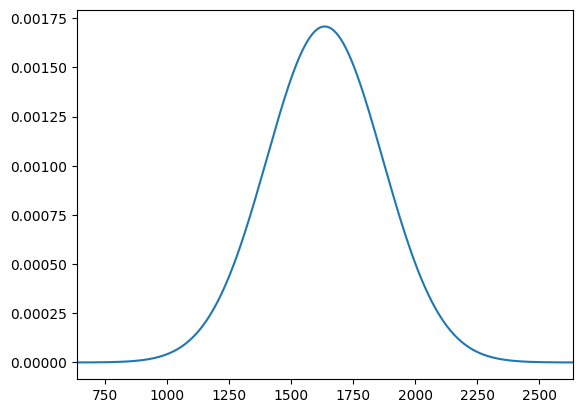

In [19]:
# Obtener la media y desviación estandar
prom_ventas = df['ventas'].mean()
sd_ventas = df['ventas'].std()

# Obtener rango de las ventas
min_ventas = df['ventas'].min()
max_ventas = df['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x = np.linspace(min_ventas,max_ventas,1000)

# Crear la distribucion normal
y1 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)

# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.set_xlim((prom_ventas-1000,prom_ventas+1000))

plt.show()

Supongamos que la direccion de la empresa quiere saber donde se ubica el 95% de los posibles valores de $\bar{X}$. Es facil mostrar que esto es:

$$\pm 1.96 * \frac{\sigma}{\sqrt{N}}

Por lo tanto:

In [26]:
p1 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).cdf(prom_ventas + 1.96 * sd_ventas/np.sqrt(30))
p2 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).cdf(prom_ventas - 1.96 * sd_ventas/np.sqrt(30))

print(p1-p2)

0.950004209703559


Graficamente:

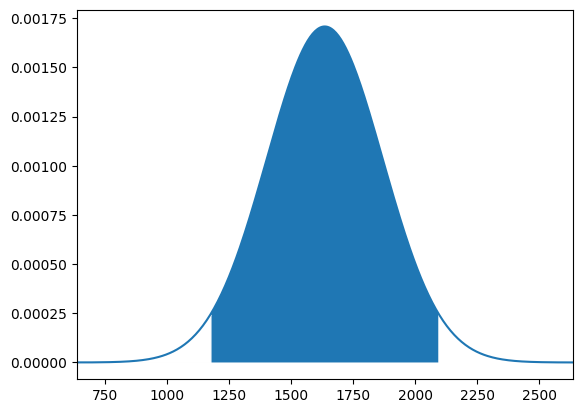

In [28]:
# Obtener la media y desviación estandar
prom_ventas = df['ventas'].mean()
sd_ventas = df['ventas'].std()

# Obtener rango de las ventas
min_ventas = df['ventas'].min()
max_ventas = df['ventas'].max()

# Crear un rango de 100 puntos entre el minimo y el maximo de las ventas
x = np.linspace(min_ventas,max_ventas,1000)

# Crear la distribucion normal
y1 = norm(loc=prom_ventas,scale=sd_ventas/np.sqrt(30)).pdf(x)

# Dibujar el histograma y la distribucion normal en conjunto
fig, ax = plt.subplots(1,1)
ax.plot(x,y1)
ax.fill_between(x[x<prom_ventas + 1.96 * sd_ventas/np.sqrt(30)],y1[x<prom_ventas + 1.96 * sd_ventas/np.sqrt(30)])
ax.fill_between(x[x<prom_ventas - 1.96 * sd_ventas/np.sqrt(30)],y1[x<prom_ventas - 1.96 * sd_ventas/np.sqrt(30)],color='white')
ax.set_xlim((prom_ventas-1000,prom_ventas+1000))


plt.show()

### Calculando el intervalo de confianza utilizando una muestra aleatoria

Supongamos que la direccion de la empresa quiere conocer un rango en el que las ventas promedio podrían estar, utilizando un intervalo de confianza del 95%. Para ello, primero tomaremos una muestra aleatoria:

In [30]:
df_sample = df.sample(30,random_state=12345)

Luego, requerimos calcular la media de las ventas:

In [31]:
media_ventas_sample = df_sample['ventas'].mean()

Luego, dado que conocemos la varianza poblacional, calcularemos un intervalo de confianza para la media:

In [32]:
ci_low = media_ventas_sample - 1.96 * sd_ventas/np.sqrt(30)
ci_up = media_ventas_sample + 1.96 * sd_ventas/np.sqrt(30)

print(ci_low, ci_up)

1341.540282913494 2257.3854094477383


De acuerdo a este intervalo de confianza, la media de las ventas está entre 1.341.540 y 2.257.385. Sabemos que la media poblacional de las ventas está alrededor de 1.600.000, el cual está contenido en este intervalo.

### Media con varianza desconocida

En la mayoria de las aplicaciones practicas, no se cuenta con una varianza ni desviación estándar conocida. En estos casos, no es posible usar los intervalos de confianza de la media con distribución normal. Alternativamente, se utiliza una distribución __T de Student__.

El directorio necesita conocer:

- Un intervalo de confianza para las ventas promedio

Para ello, debemos calcular la desviacion estandar muestral:

In [33]:
sd_ventas_m = df_sample['ventas'].std()

Luego, observando la tabla de la distribución T de Student, el valor para 29 grados de libertad es igual a 2,045. Entonces:

In [34]:
ci_low = media_ventas_sample - 2.045 * sd_ventas_m/np.sqrt(30)
ci_up = media_ventas_sample + 2.045 * sd_ventas_m/np.sqrt(30)

print(ci_low, ci_up)

1289.5409408800094 2309.384751481223


Ahora, dejaremos de asumir que la base de datos de 473 trabajadores es la población, sino que es una muestra completa. Dado que no conocemos la desviación estándar poblacional, debemos usar la distribución T. En este caso, los grados de libertad son lo suficientemente grandes para que el valor de la distribución sea igual a 1.96, igual que la distribución normal estándar. Entonces:

In [38]:
ci_low = prom_ventas - 1.96 * sd_ventas/np.sqrt(473)
ci_up = prom_ventas + 1.96 * sd_ventas/np.sqrt(473)

print(ci_low, ci_up)

1519.537015222902 1750.1862912424049
